### **STUDENT PERFORMANCE INDICATOR** 


### ***LIFE CYCLE OF MACHINE LEARNING PROJECT***

1. Understanding problem statement
2. Data Collection
3. Data checks to perform
4. Exploratory Data Analysis
5. Data Pre-processing
6. Model Training
7. Choose best model

### **1. Problem Statement**

This project aims to understand how the student's performance(test scores) is affected based on different factors such as Gender, Ethnicity, Parental level of education, Lunch, Test preparation course

### **Data Collection**
- Data Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The dataset has 8 columns and 1000 rows

### 2.1 Import Data and Required Packages

In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import CSV Data as Python DataFrame

In [2]:
df = pandas.read_csv('data/stud.csv')

### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape Of Dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information

1. Gender : sex of students ->(Male/Female)
2. Ethnicity : Group (A/B/C/D/E)
3. Lunch : Standard or Free/Reduced
4. Parent Level of Education: bachelor's degree, some college, master's degree, associate's degree, high school, some high school
5. Test Preparation Course : None, Completed
6. Reading Score
7. Math Score
8. Writing Score





### **3. Data Checks To Perform**
- Check missing value
- Check duplicates
- Check Data Type
- Check Number of Unique Values for each column
- Check statistics of dataset
- Check various categories present in different categorical columns

### 3.1 Check Missing Value

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There is no missing value in the dataset

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

### There are no duplicates in the dataset 

### 3.3 Check Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Statistics of data

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights
- From the above decription, the means of all he numerical features are very close to each other.
- All standard deviations are also close --between 14.6 and 15.19


### 3.6 Exploring Data


In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
for cat in df.dtypes[df.dtypes == 'object'].index:
    print(f"Categories in {cat} : {df[cat].unique()}")

Categories in gender : ['female' 'male']
Categories in race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test_preparation_course : ['none' 'completed']


In [12]:
### Define numerical and categorical features
numerical_features = [feature for feature in df.dtypes[df.dtypes != 'object'].index]

categorical_features = [feature for feature in df.dtypes[df.dtypes == 'object'].index]


### print the features
print('We have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding new columns for Average and Total Scores

In [13]:
df['Total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
print("Number of students with full marks in Math:",df[df['math_score']==100]['Average'].count())
print("Number of students with full marks in Reading:",df[df['reading_score']==100]['Average'].count())
print("Number of students with full marks in Writing:",df[df['writing_score']==100]['Average'].count())


Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [15]:
print("Number of students who scored <=20 in Math:",df[df['math_score']<=20]['Average'].count())
print("Number of students who scored <=20 in Reading:",df[df['reading_score']<=20]['Average'].count())
print("Number of students who scored <=20 in Writing:",df[df['writing_score']<=20]['Average'].count())

Number of students who scored <=20 in Math: 4
Number of students who scored <=20 in Reading: 1
Number of students who scored <=20 in Writing: 3


### Insights
- Students have performed well in reading.
- Students have performed worst in math.

### 4. Data Visualization

#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

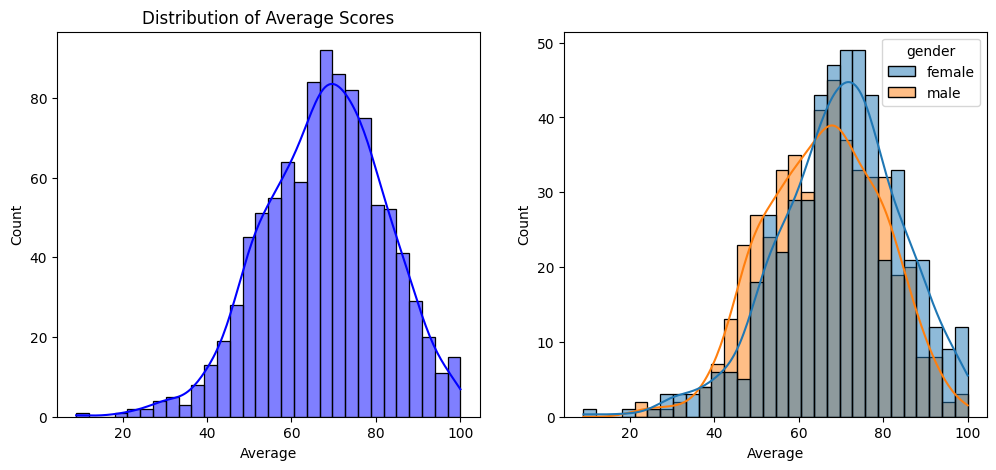

In [16]:
fig, ax =plt.subplots(1,2, figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Average'],kde=True,bins=30,color='blue')
plt.title('Distribution of Average Scores')
plt.subplot(1,2,2)
sns.histplot(data=df,x='Average',kde=True,bins=30,hue='gender')
plt.show()

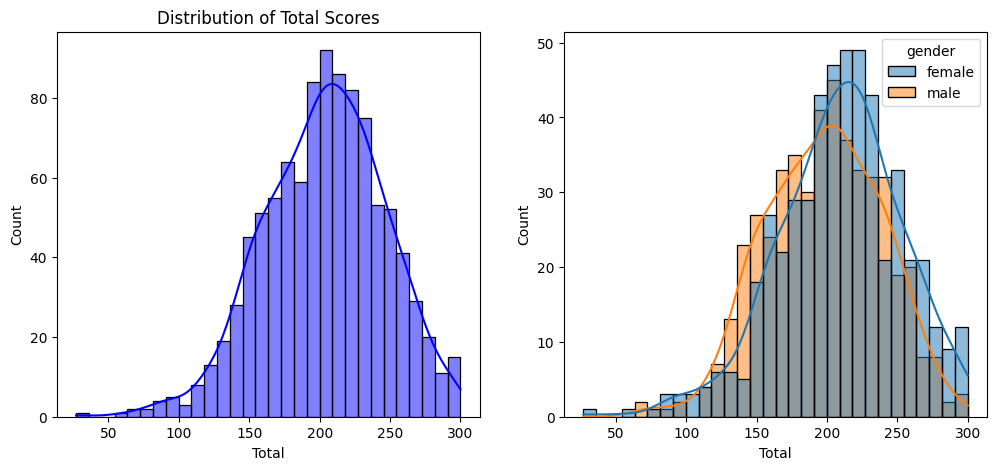

In [17]:
fig, ax =plt.subplots(1,2, figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Total'],kde=True,bins=30,color='blue')
plt.title('Distribution of Total Scores')
plt.subplot(1,2,2)
sns.histplot(data=df,x='Total',kde=True,bins=30,hue='gender')
plt.show()

#### Insights
- Female Students have performed better compared to male students.


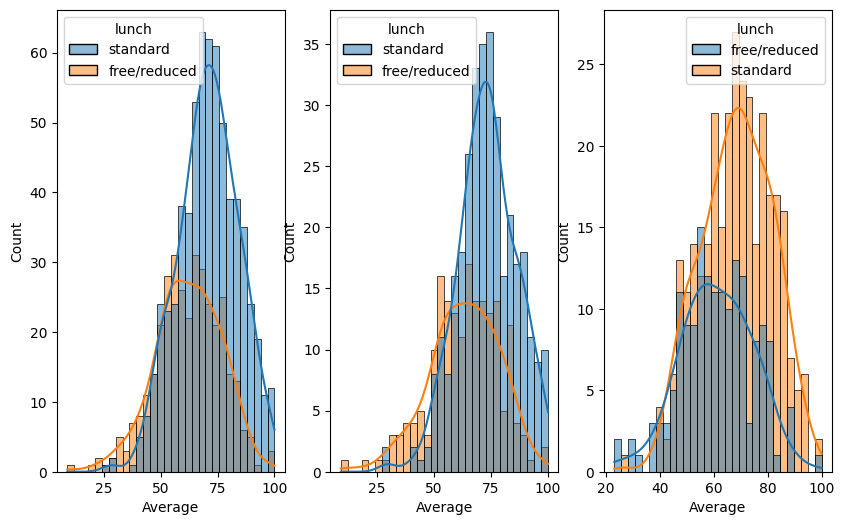

In [18]:
plt.subplots(1,3,figsize=(10,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='Average',kde=True,bins=30,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='Average',kde=True,bins=30,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x="Average",kde=True,bins=30,hue='lunch')
plt.show()

### Insight
- The average score increases if the lunch is "standard", be it a girl or a boy.

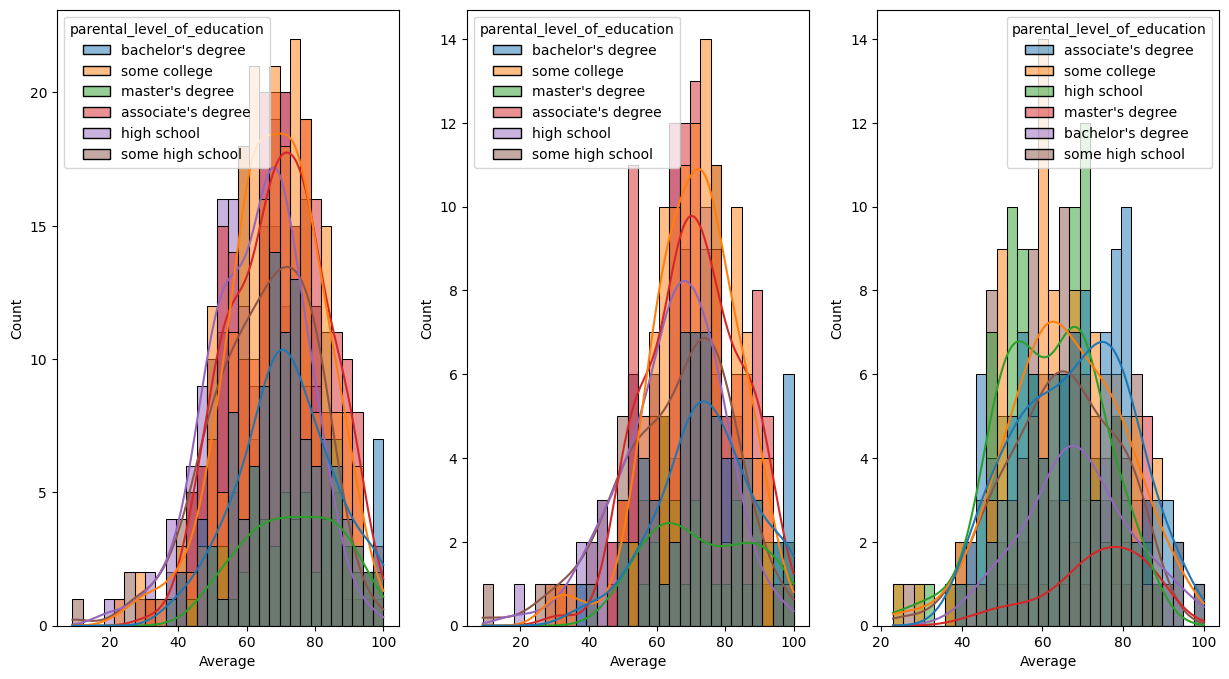

In [19]:
plt.subplots(1,3,figsize=(15,8))
plt.subplot(1,3,1)
sns.histplot(data=df,x='Average',kde=True,bins=30,hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='Average',kde=True,bins=30,hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x="Average",kde=True,bins=30,hue='parental_level_of_education')
plt.show()

### Insights
- In general, the parental level of education doesn't matter in the performance of the student.

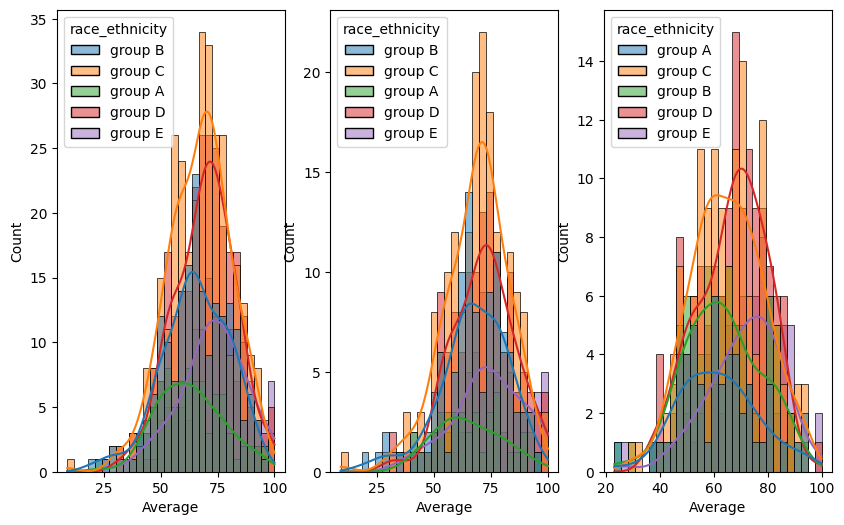

In [20]:
plt.subplots(1,3,figsize=(10,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='Average',kde=True,bins=30,hue='race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='Average',kde=True,bins=30,hue='race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x="Average",kde=True,bins=30,hue='race_ethnicity')
plt.show()

### Insights
- Most of students from Group C perform well.
- Students from Group A perform poorly in exams

### Maximum Scores of students in all three subjects

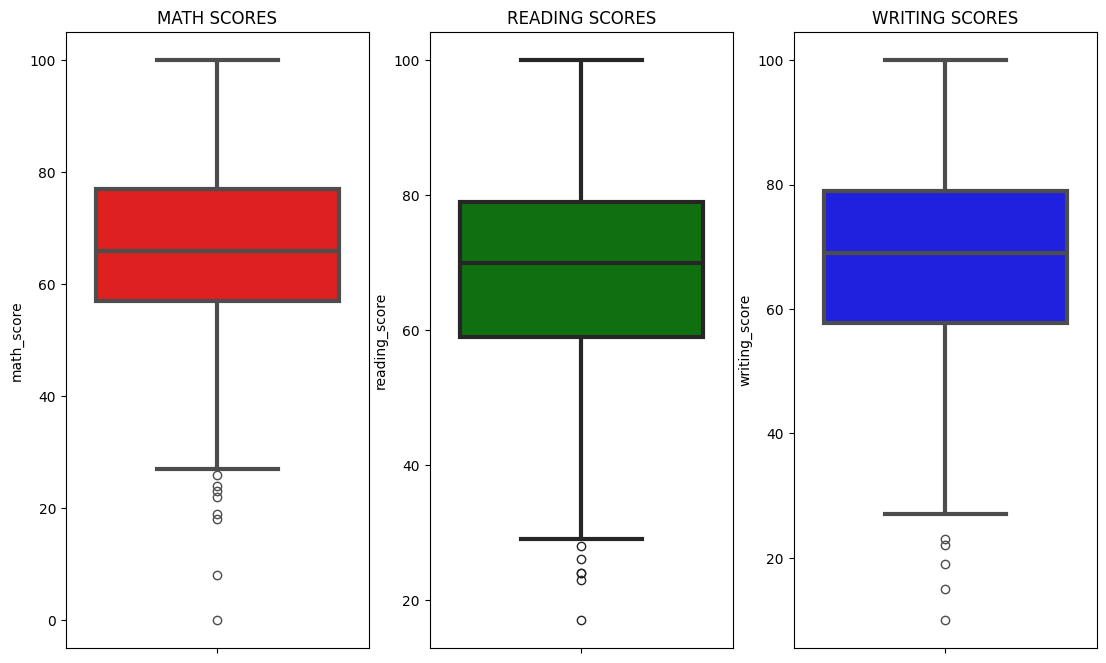

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights
- Most students have scored between 60-80 in all three subjects.

#### 4.3 Multivariate analysis using pieplot

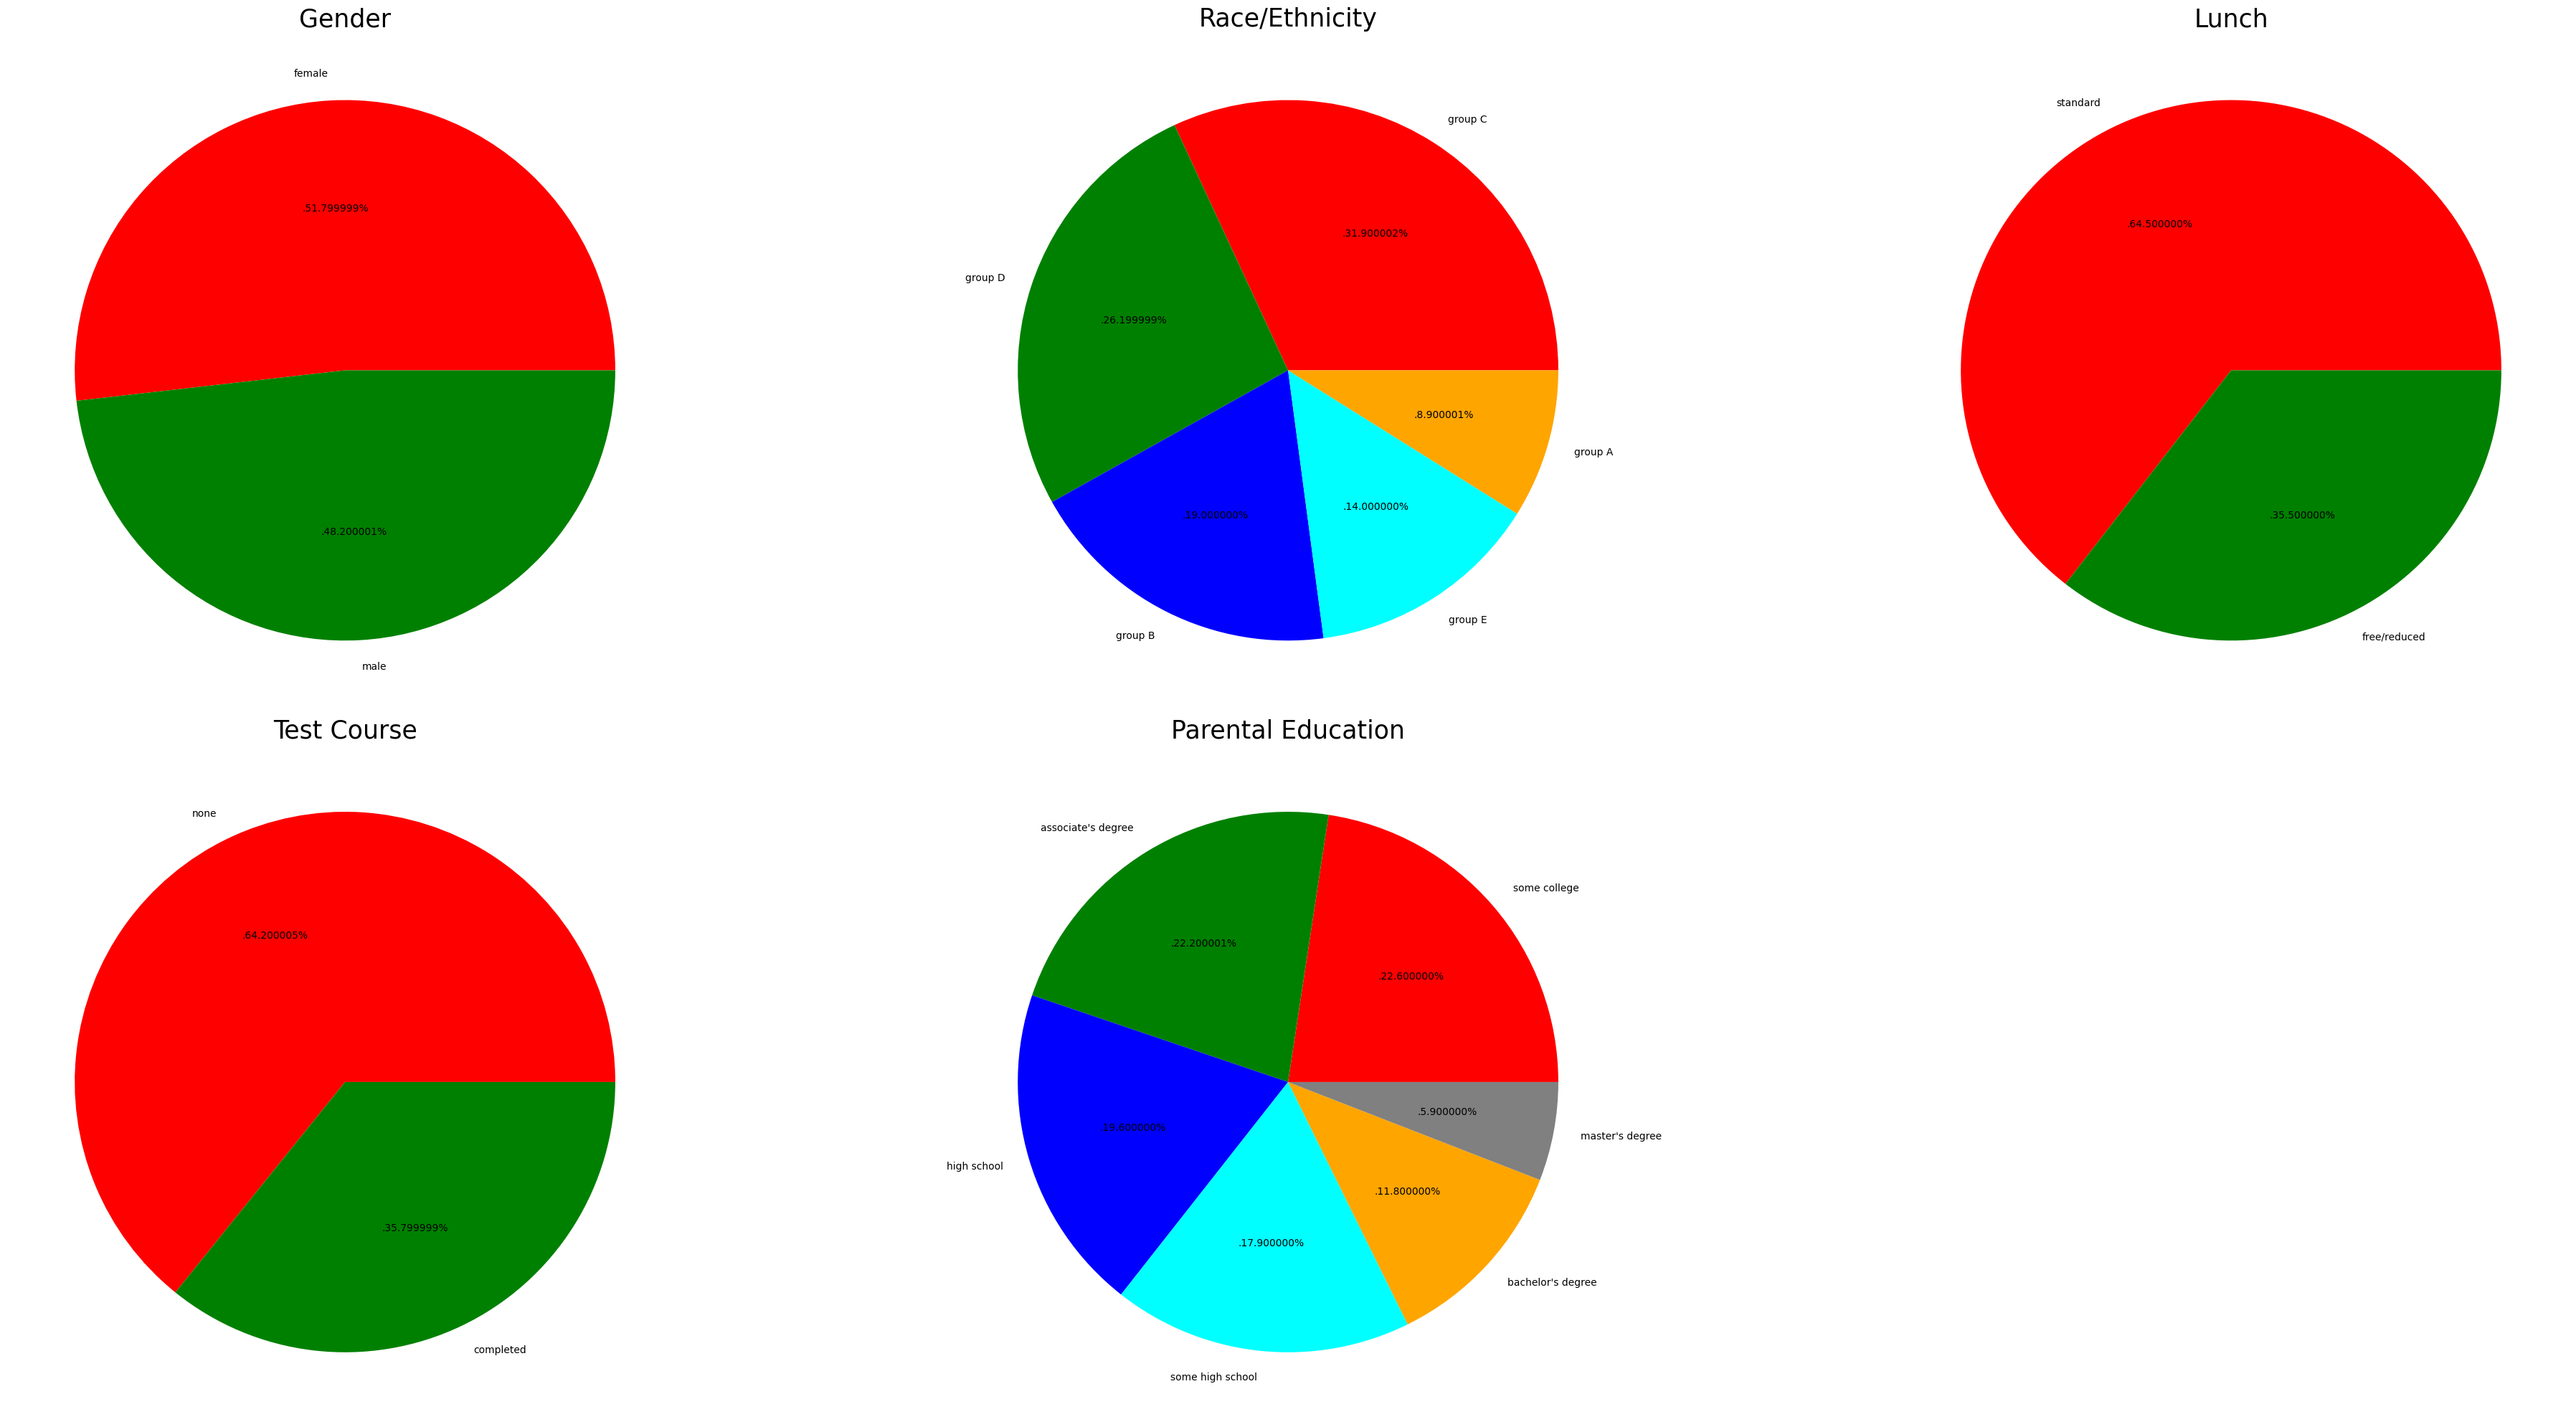

In [27]:
plt.rcParams['figure.figsize'] = (40, 20)

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()

color = ['red','green']


plt.pie(size, colors = color, labels = size.index,autopct = '.%2f%%')
plt.title('Gender', fontsize = 25)
plt.axis('off')



plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()

color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = size.index,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 25)
plt.axis('off')



plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()

color = ['red','green']

plt.pie(size, colors = color,labels = size.index,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 25)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()

color = ['red','green']

plt.pie(size, colors = color,labels = size.index,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 25)
plt.axis('off')


plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()

color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = size.index,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 25)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
- Number of male and female students are almost equal.
- The most students are from Group C.
- Most student have standard lunch.
- Number of students who have not enrolled in any courses are higher.
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Analysis

#### 4.4.1 Gender (does gender impact the performace of students?)

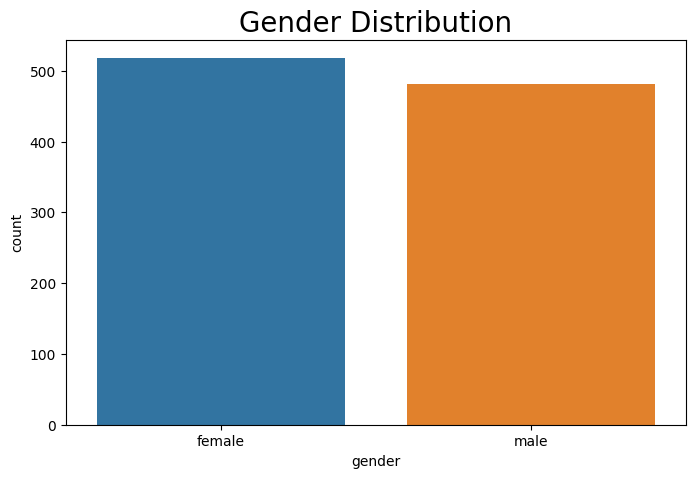

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='gender',hue='gender')
plt.title('Gender Distribution', fontsize=20)
plt.show()

#### Insight
- The gender ratio is almost equal

In [38]:
gender_group = df.groupby('gender')['Average'].mean()
gender_group

gender
female    69.569498
male      65.837483
Name: Average, dtype: float64

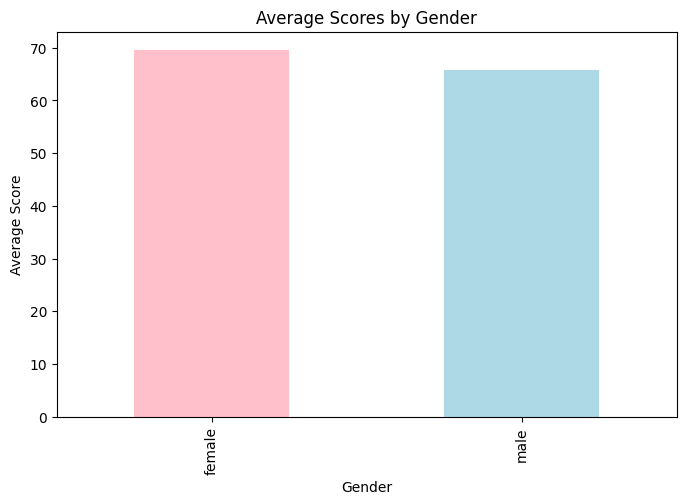

In [40]:
plt.figure(figsize=(8,5))
gender_group.plot(kind='bar', color=['pink','lightblue'])
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.show()

### Insights
- Female students are more likely to perform better than male students.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

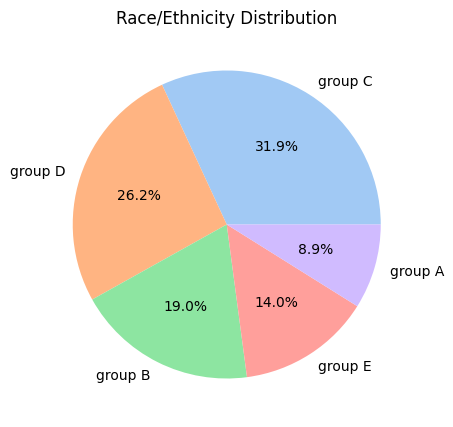

In [45]:
plt.figure(figsize=(8,5))
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title("Race/Ethnicity Distribution")
plt.show()

In [46]:
race_group=df.groupby('race_ethnicity')['Average'].mean()
race_group

race_ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: Average, dtype: float64

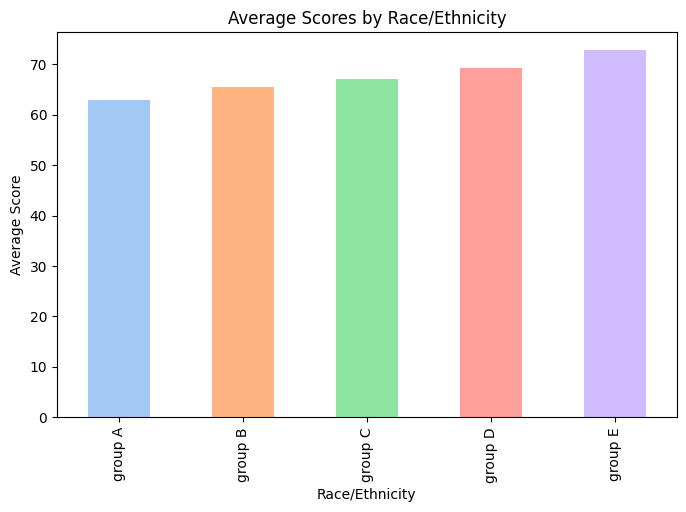

In [48]:
plt.figure(figsize=(8,5))
race_group.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Average Scores by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.show()

### Insights 
- Group C has most students followed by Group D
- Group A has least students
- Group E performed well amongst all the groups.
- Group A performed the poorest.

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

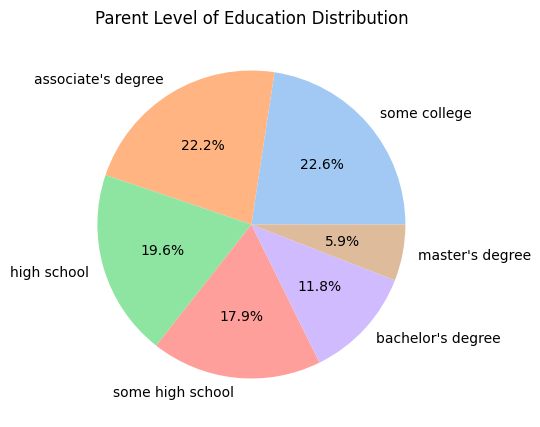

In [50]:
plt.figure(figsize=(8,5))
plt.pie(x=df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().index,autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title("Parent Level of Education Distribution")
plt.show()

In [51]:
parent_group=df.groupby('parental_level_of_education')['Average'].mean()
parent_group

parental_level_of_education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: Average, dtype: float64

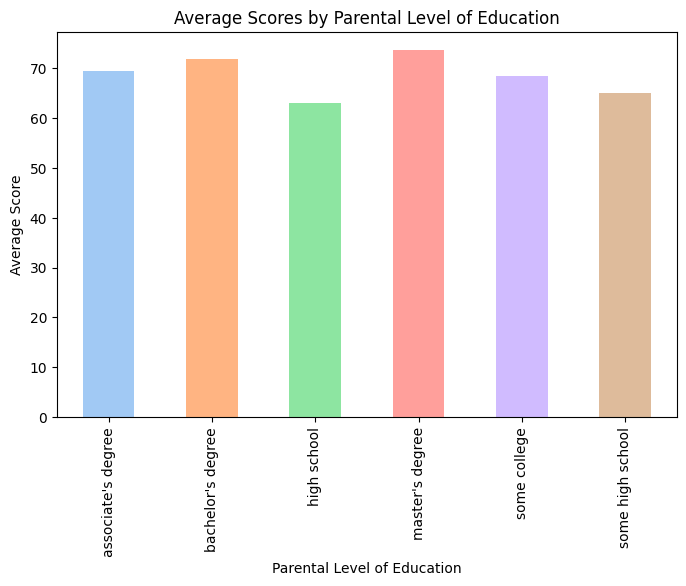

In [52]:
plt.figure(figsize=(8,5))
parent_group.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Average Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.show()

#### Insights
- Largest group of parents are from some college.
- Students with parent having master's or bachelor's degree performed well

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

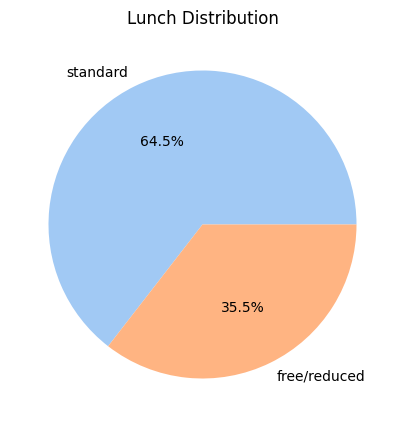

In [53]:
plt.figure(figsize=(8,5))
plt.pie(x=df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title("Lunch Distribution")
plt.show()

In [54]:
lunch_group=df.groupby('lunch')['Average'].mean()
lunch_group

lunch
free/reduced    62.199061
standard        70.837209
Name: Average, dtype: float64

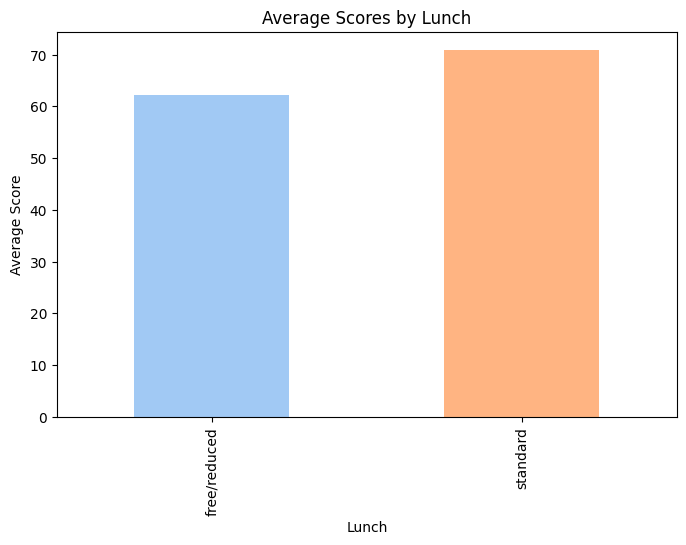

In [55]:
plt.figure(figsize=(8,5))
lunch_group.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Average Scores by Lunch')
plt.xlabel('Lunch')
plt.ylabel('Average Score')
plt.show()

### Insights
- Most students have standard lunch and they tend to perform better than students with free lunch.

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Is Test prepration course has any impact on student's performance ?

In [56]:
test_group=df.groupby('test_preparation_course')['Average'].mean()
test_group

test_preparation_course
completed    72.669460
none         65.038941
Name: Average, dtype: float64

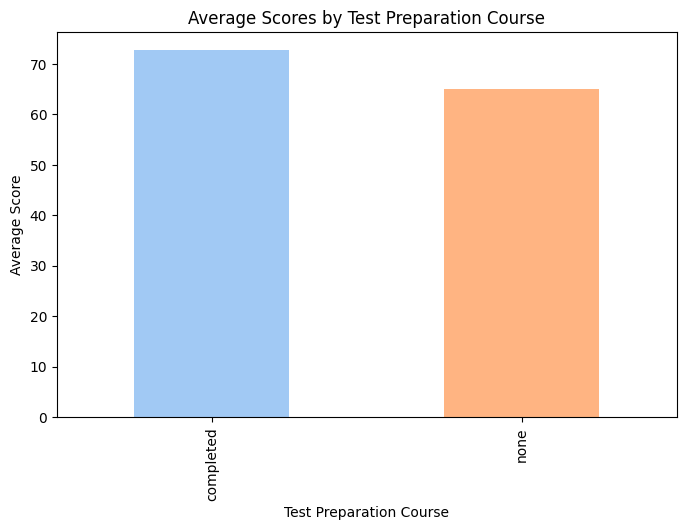

In [57]:
plt.figure(figsize=(8,5))
test_group.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Average Scores by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.show()

#### Insights
- Students who are enrolled in a course tend to perform better than those who enrolled in none.